In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pyautogui

In [2]:
x_datas = []
y_datas = []
times = []

In [3]:
screen_width, screen_height = pyautogui.size()

In [4]:
with open("data.txt", "r") as file:
    for line in file:
        values = line.strip().split(',')

        x = float(values[0])
        y = float(screen_height) - float(values[1])
        time = float(values[2])

        x_datas.append(x)
        y_datas.append(y)
        times.append(time)

print("x : ", x_datas[:5])
print("y : ", y_datas[:5])
print("time : ", times[:5])


x :  [1035.28515625, 1153.4453125, 487.171875, 1105.77734375, 649.3515625]
y :  [789.12890625, 761.90234375, 548.453125, 779.15625, 430.5625]
time :  [87.57, 87.878, 100.647, 101.623, 102.547]


In [5]:
max_time = max(times)

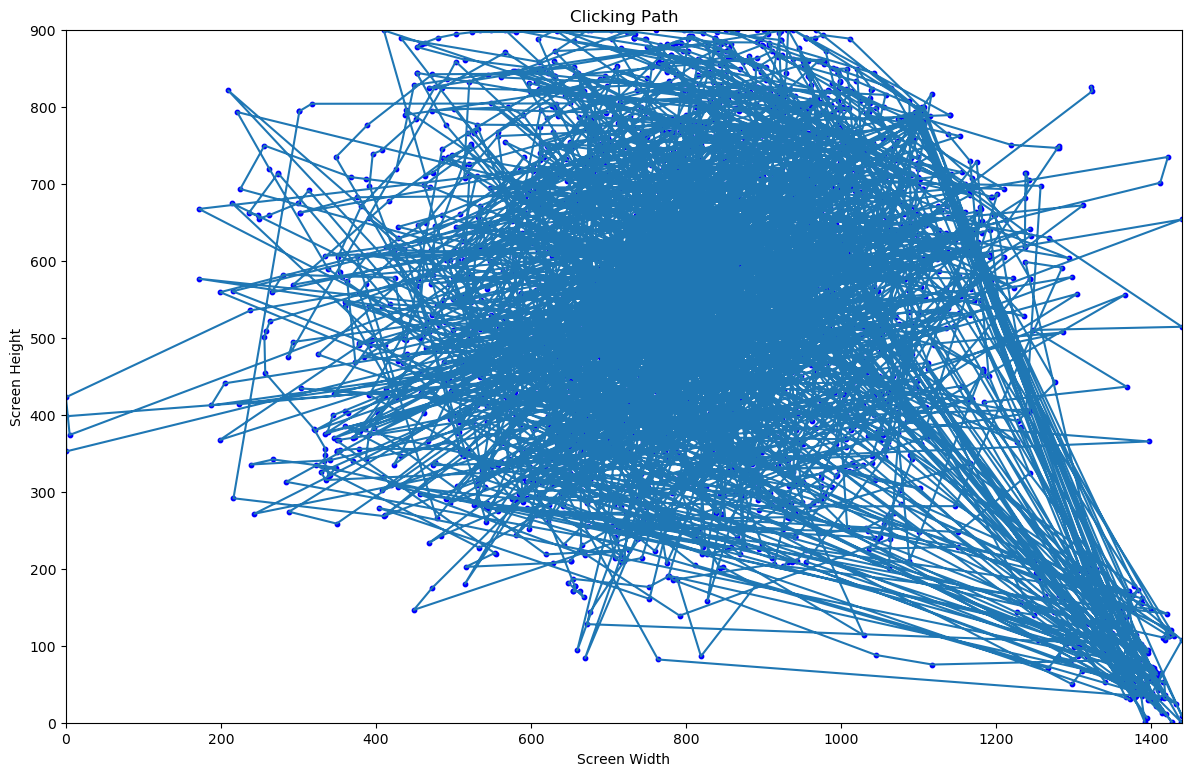

In [6]:
plt.figure(figsize=(14.40, 9.00))
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title('Clicking Path')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)

plt.scatter(x_datas, y_datas, marker='o', color='blue', s=10)
plt.plot(x_datas, y_datas)

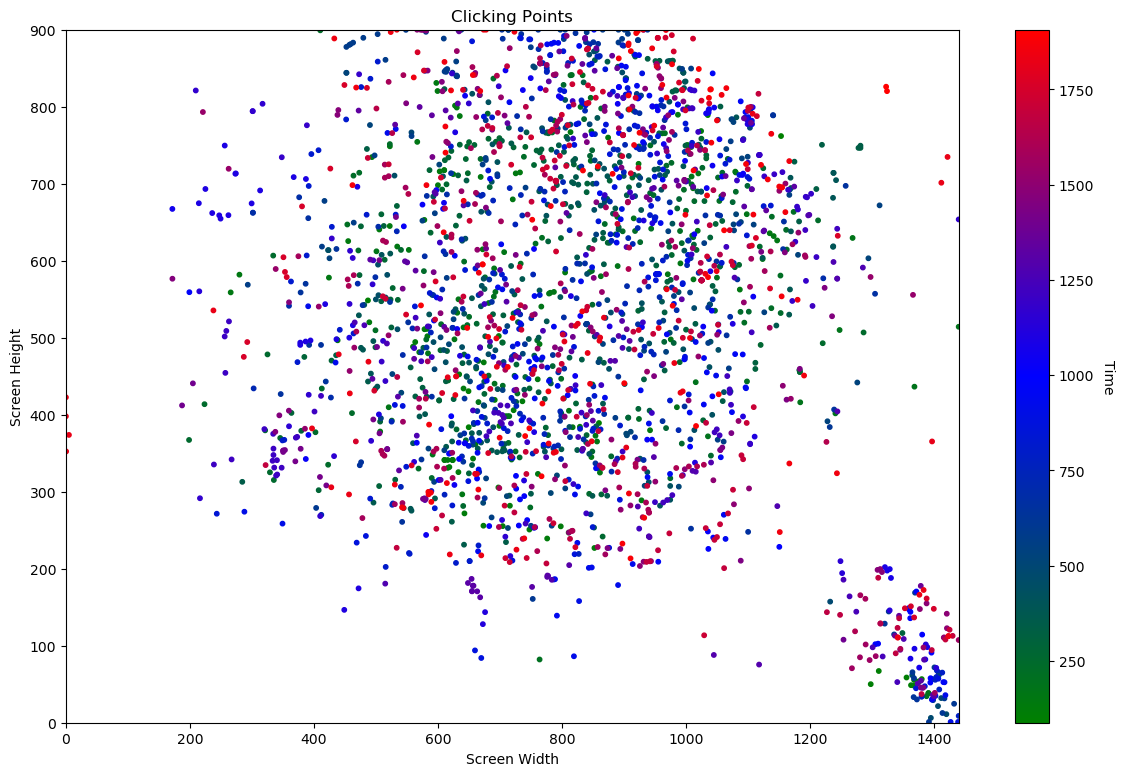

In [7]:
plt.figure(figsize=(14.40, 9.00))
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title('Clicking Points')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)

colors = ['red', 'green', 'blue']
num_colors = 256
color_levels = np.linspace(0, 1, num_colors)
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, 'green'), (0.5, 'blue'), (1, 'red')])

norm = plt.Normalize(min(times), max(times))

plt.scatter(x_datas, y_datas, c=times, cmap=cmap, s=10, norm=norm)
colorbar = plt.colorbar()
colorbar.set_label('Time', rotation=270, labelpad=15)
plt.show()